In [1]:
!pip install pysr

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from pysr import pysr, best, best_callable

In [4]:
x0 = np.random.random(100) * 2 * np.pi - np.pi
x1 = np.random.random(100) * 2 * np.pi - np.pi
y = np.sin(x0)
df = pd.DataFrame(columns=["x0","x1","y"],data=np.array([x0,x1,y]).transpose(),index=None)

<AxesSubplot:xlabel='x0', ylabel='Count'>

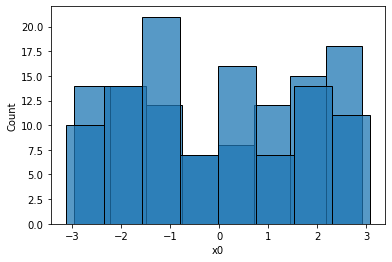

In [5]:
sns.histplot(x="x0",data=df)
sns.histplot(x="x1",data=df)

<AxesSubplot:xlabel='x0', ylabel='y'>

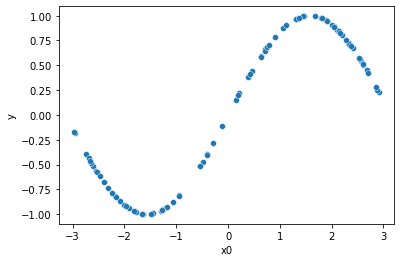

In [6]:
sns.scatterplot(x="x0",y="y",data=df)

In [7]:
df["y"] += np.random.random(100) / 10

<AxesSubplot:xlabel='x0', ylabel='y'>

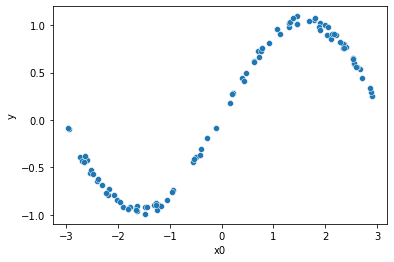

In [8]:
sns.scatterplot(x="x0",y="y",data=df)

In [9]:
X = np.array(df.drop("y",axis=1))
y = np.array(df["y"])

In [10]:
equations = pysr(
    X,
    y,
    niterations=2,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
    ],
)


Running on julia -O3 C:\Users\GEORGE~1\AppData\Local\Temp\tmp2pnwens7\runfile.jl
Activating environment on workers.
      From worker 5:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
      From worker 4:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
      From worker 3:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
      From worker 2:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
Importing installed module on workers...Finished!
Copying definition of inv to workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!

Cycles per second: 6.560e+02
Head worker occupation: 2.9%
Progress: 1 / 40 total iterations (2.500%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           5.765e-01  1.192e-07  0.0798819
2           3.617e-03  5.071e+00  sin(x0)
4           8.540e-04

In [11]:
print(best(equations))

sin(x0)


In [12]:
df["r"] = best_callable()(X)

<AxesSubplot:xlabel='x0', ylabel='Y'>

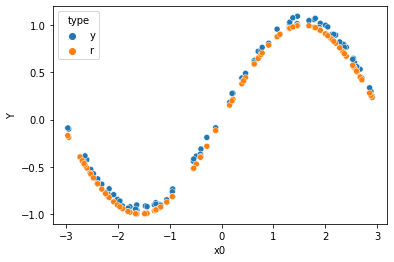

In [13]:
sns.scatterplot(x="x0",y="Y",hue="type",data=df.melt(id_vars=["x0"],value_vars=["y","r"],var_name="type",value_name="Y"))

In [14]:
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "square",
        "cube"
    ],
)


Running on julia -O3 C:\Users\GEORGE~1\AppData\Local\Temp\tmpyrwd3f6_\runfile.jl
Activating environment on workers.
      From worker 4:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
      From worker 3:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
      From worker 5:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
      From worker 2:	  Activating environment at `C:\miniconda3\Lib\site-packages\Project.toml`
Importing installed module on workers...Finished!
Testing module on workers...Finished!
Testing entire pipeline on workers...Finished!
Started!

Cycles per second: 4.330e+02
Head worker occupation: 1.9%
Progress: 1 / 100 total iterations (1.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           5.765e-01  1.192e-07  0.079908535
3           1.576e-01  6.486e-01  (0.3497103 * x0)
5           1.554e-01  6.884e-03  (0.04647951 + (0.3484282

In [15]:
print(best(equations))

-0.11894336*x0**3 + x0


In [16]:
df["t"] = best_callable()(X)

<AxesSubplot:xlabel='x0', ylabel='Y'>

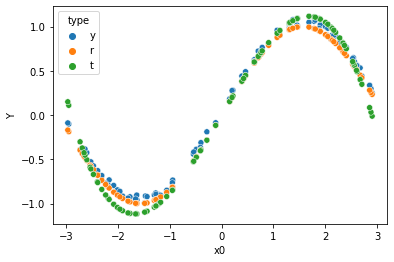

In [17]:
sns.scatterplot(x="x0",y="Y",hue="type",data=df.melt(id_vars=["x0"],value_vars=["y","r","t"],var_name="type",value_name="Y"))

sin(x) = x - x^3 / 6 + ...